# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating this from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$.

### Define the units

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
u = 1.66e-27 * kg
M_solar = 2e30 * kg
g = 1e-3 * kg

c = 3e5 * km/s

# other quantities
m_p = 0.938 * GeV
v0 = 220 * km / s / c
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

Define the constants necessary for the computations

In [3]:
# problem related quantities
A = 131.293 * GeV
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
factor_R0 = T * m_det * rho0 * A * (2*v0/np.sqrt(np.pi)) / m_p**2

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [4]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x*c * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2 * c**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [5]:
confidence = 95
m_x = 100 * GeV

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.0595667168922668e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

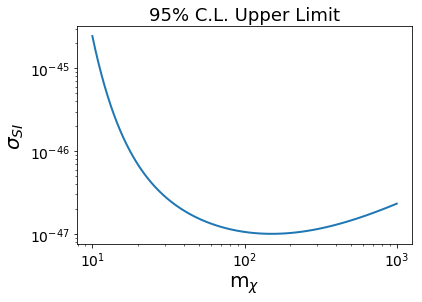

In [12]:
m_arr = np.logspace(1, 3, 100)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(m_arr, sigma_px(m_arr), lw=2)
ax.set_xlabel(r'm$_{\chi}$', fontsize=20)
ax.set_ylabel(r'$\sigma_{SI}$', fontsize=20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title(r'95% C.L. Upper Limit', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Part 2

[  10.           12.74274986   16.23776739   20.69138081   26.36650899
   33.59818286   42.81332399   54.55594781   69.51927962   88.58667904
  112.88378917  143.84498883  183.29807108  233.57214691  297.63514416
  379.26901907  483.29302386  615.84821107  784.75997035 1000.        ] 3e-06


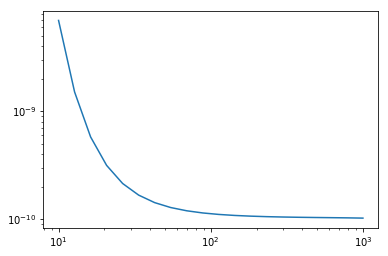

In [13]:
# Recoil energy between 3 and 10 keV
# Mass of WIMP between 10 and 1000 GeV
m = np.logspace(1, 3, 20)
sigma_px = np.logspace(-47, -43, 20) 
# E_r = np.logspace(-3, 1, 20)
print(m, E_thresh)

R = factor_R0 * sigma_px * mu(m)**2 * np.exp(-E_r / r(m)*E0(m)) / m

plt.figure()
plt.loglog(m, R)
plt.show()
                                             
# print(R)

In [8]:
# events = 10
# expected = 12 
    
# def chi_square(n_events, n_expected):
#     difference = n_events - n_expected
#     return (n_events - n_expected)**2 / difference**2

# print(chi_square(events, expected))
    